# Day Candlestick Color - Analytics

### Import Library

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import pandas_ta as ta
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 120
import warnings
warnings.filterwarnings('ignore')

### Load Price Data

In [2]:
import os
from pathlib import Path
notebook_path = os.getcwd()
current_dir = Path(notebook_path)
csv_file = str(current_dir) + '/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    print('remote')
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [3]:
data = dataset.copy()

In [4]:
# data = data[data.index > '2020-11-01 00:00:00']

In [5]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2025-11-04 14:10:00,1890.7,1891.0,1885.5,1887.3,5379
2025-11-04 14:15:00,1887.2,1899.0,1887.2,1898.5,13871
2025-11-04 14:20:00,1898.2,1907.7,1897.0,1904.2,16090


In [6]:
daily_data = data.resample('D').agg({
        'Volume': 'sum',
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min'
    })
daily_data.dropna(subset=['Close'], inplace=True)

## Data Labeling

In [7]:
daily_data["color"] = daily_data.apply(lambda r: "doji" if r["Open"] == r["Close"] else ("green" if  r["Open"] < r["Close"] else "red"), axis=1)
daily_data["next_color"] = daily_data["color"].shift(1)
daily_data.dropna(inplace=True)

In [8]:
daily_data

,Volume,Open,Close,High,Low,color,next_color
Date,,,,,,,
2018-08-14,79266,955.5,959.3,961.8,952.1,green,green
2018-08-15,89449,958.0,946.6,962.3,946.6,red,green
2018-08-16,71410,942.4,947.0,947.3,935.5,green,red
2018-08-17,98531,952.2,947.0,954.6,945.0,red,green
2018-08-20,88210,946.1,945.0,951.5,942.6,red,red
...,...,...,...,...,...,...,...
2025-10-29,273188,1943.8,1947.0,1964.7,1936.1,green,green
2025-10-30,331492,1947.0,1927.0,1948.4,1910.5,red,green
2025-10-31,341853,1928.0,1892.0,1928.0,1887.5,red,red


Text(0.5, 1.0, "Tỷ lệ Doji / Green / Red của cột 'color'")

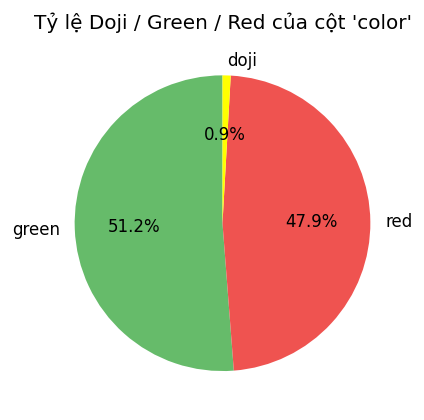

In [9]:
counts = daily_data['color'].value_counts()

# Vẽ biểu đồ tròn
plt.figure(figsize=(4, 4))
plt.pie(
    counts,
    labels=counts.index.astype(str),
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66bb6a', '#ef5350', 'yellow']
)
plt.title("Tỷ lệ Doji / Green / Red của cột 'color'")

### Body size and IBS

In [10]:
daily_data['body_size'] = abs(daily_data['Close'] - daily_data['Open'])
daily_data['ibs'] = daily_data.apply(lambda r: (r['Close'] - r['Low']) / (r['High'] - r['Low']), axis=1)

Text(0.5, 1.0, 'Seaborn Colored Scatter Distribution')

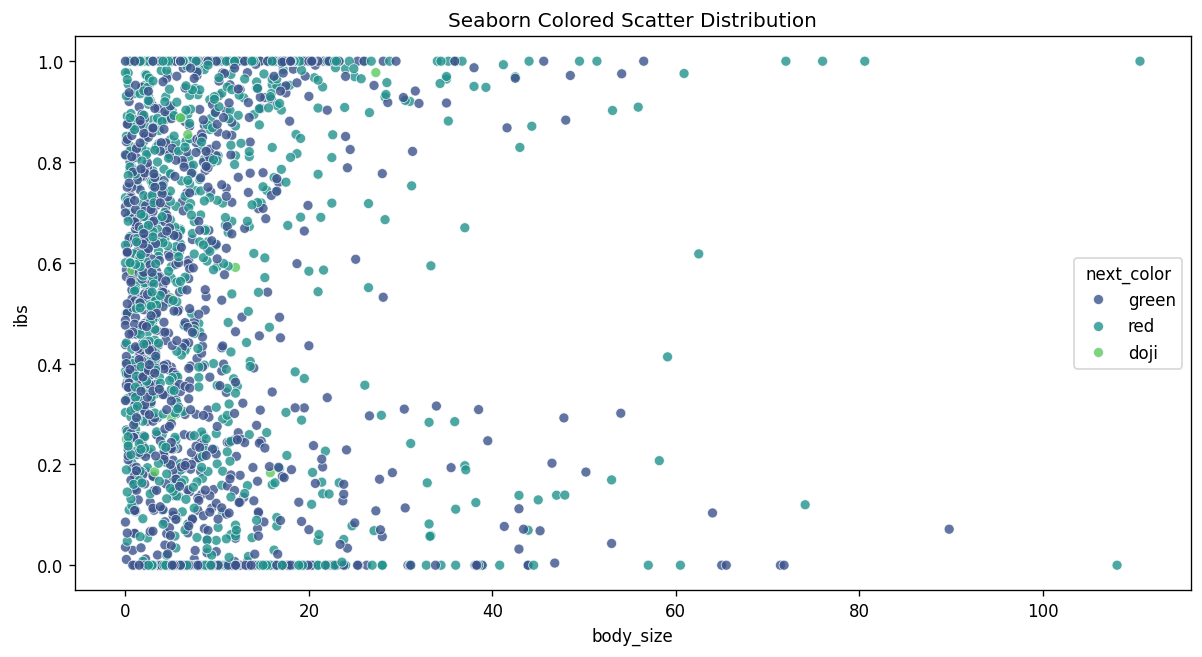

In [11]:
sns.scatterplot(
    data=daily_data[['body_size', 'ibs', 'next_color']],
    x='body_size',
    y='ibs',
    hue='next_color',        # tô màu theo cột
    palette='viridis',  # bảng màu
    alpha=0.8
)
plt.title('Seaborn Colored Scatter Distribution')

### RSI & EMA diff

In [12]:
daily_data['RSI'] = ta.rsi(daily_data["Close"], length=14)
daily_data['EMA_fast'] = ta.ema(daily_data["Close"], length=10)
daily_data['EMA_low'] = ta.ema(daily_data["Close"], length=200)
daily_data['EMA_diff'] = daily_data['EMA_fast'] - daily_data['EMA_low']

Text(0.5, 1.0, 'Seaborn Colored Scatter Distribution')

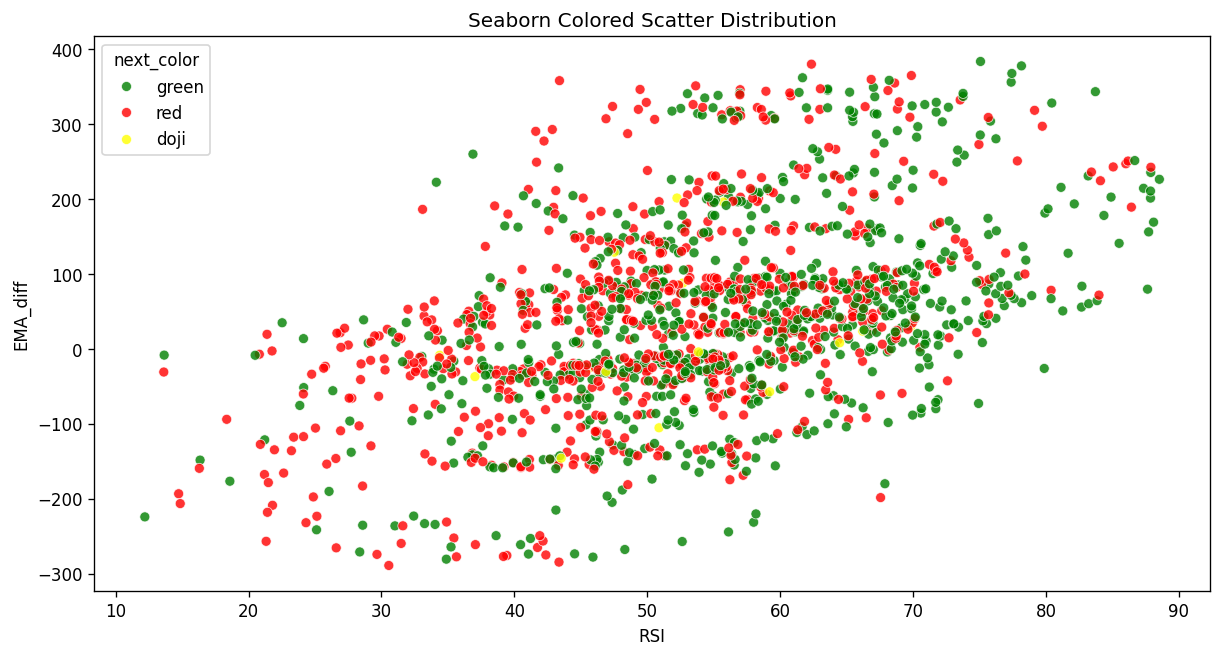

In [13]:
sns.scatterplot(
    data=daily_data[['RSI', 'EMA_diff', 'next_color']],
    x='RSI',
    y='EMA_diff',
    hue='next_color',        # tô màu theo cột
    palette={'green':'green','red':'red','doji':'yellow'},
    alpha=0.8
)
plt.title('Seaborn Colored Scatter Distribution')

## Price & Volume change

Text(0.5, 1.0, "Next day's color Distribution by Price & Volume change")

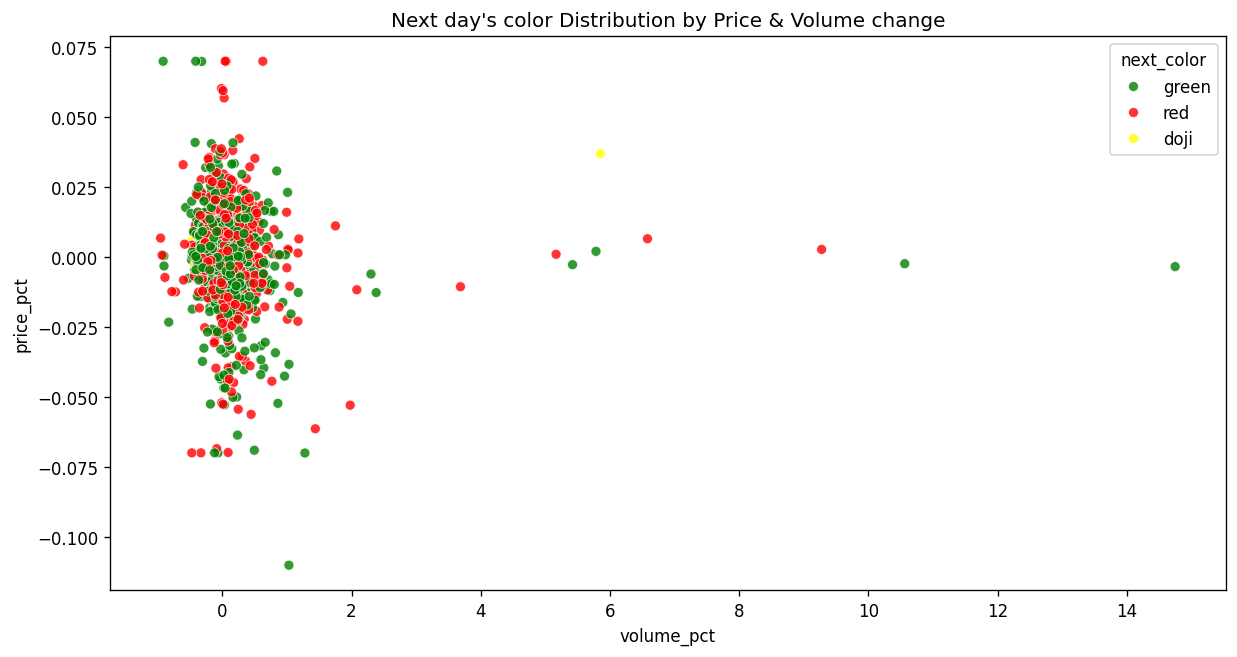

In [15]:
daily_data['price_pct'] = daily_data['Close'].pct_change()
daily_data['volume_pct'] = daily_data['Volume'].pct_change()
sns.scatterplot(
    data=daily_data[['price_pct', 'volume_pct', 'next_color']],
    x='volume_pct',
    y='price_pct',
    hue='next_color',
    palette={'green':'green','red':'red','doji':'yellow'},
    alpha=0.8
)
plt.title("Next day's color Distribution by Price & Volume change")

## Next open vs pivot & Day H-L

Text(0.5, 1.0, "Next day's color Distribution by Next open vs pivot & Day H-L")

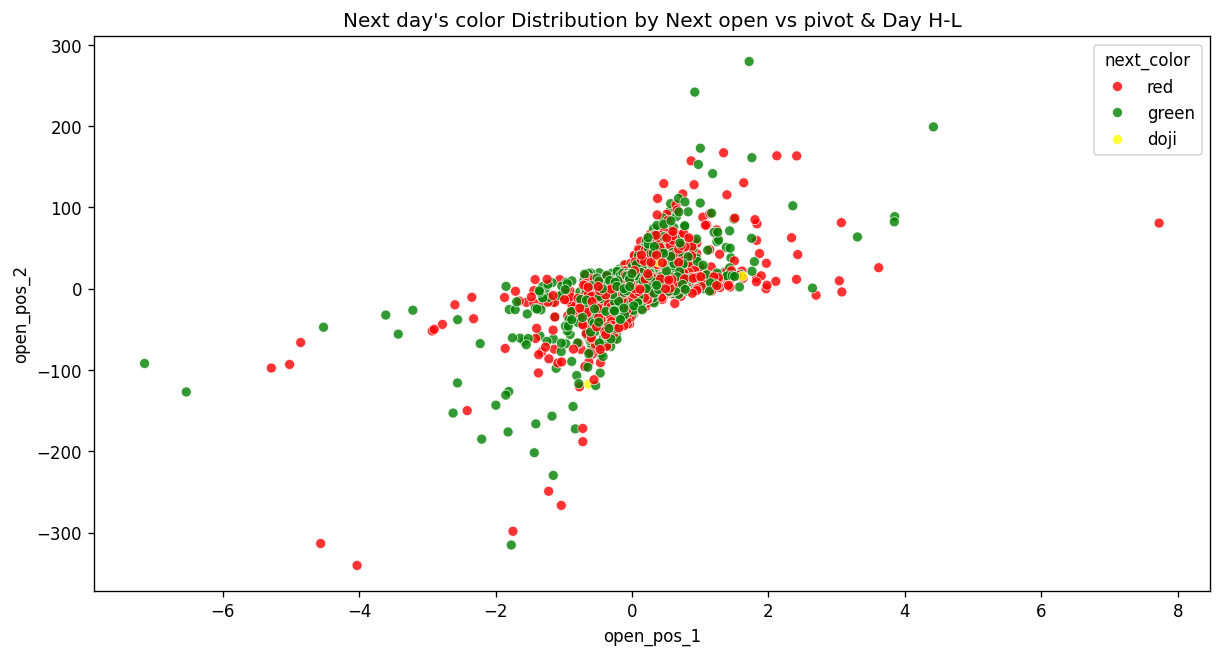

In [16]:
daily_data['next_Open'] = daily_data['Open'].shift(-1)
daily_data['pivot'] = daily_data.apply(lambda r: (r['High']+r['Low'] + r['Close']) / 3, axis=1)
daily_data['open_pos_1'] = (daily_data['next_Open'] - daily_data['pivot']) * 100 / daily_data['pivot']
daily_data['open_pos_2'] = (daily_data['next_Open'] - daily_data['Close']) * 100 / (daily_data['High'] - daily_data['Low'])
daily_data.dropna(inplace=True)
sns.scatterplot(
    data=daily_data[['open_pos_1', 'open_pos_2', 'next_color']],
    x='open_pos_1',
    y='open_pos_2',
    hue='next_color',
    palette={'green':'green','red':'red','doji':'yellow'},
    alpha=0.8
)
plt.title("Next day's color Distribution by Next open vs pivot & Day H-L")

## RSI22 vs RSI 50

Text(0.5, 1.0, "Next day's color Distribution by RSI7 & RSI22")

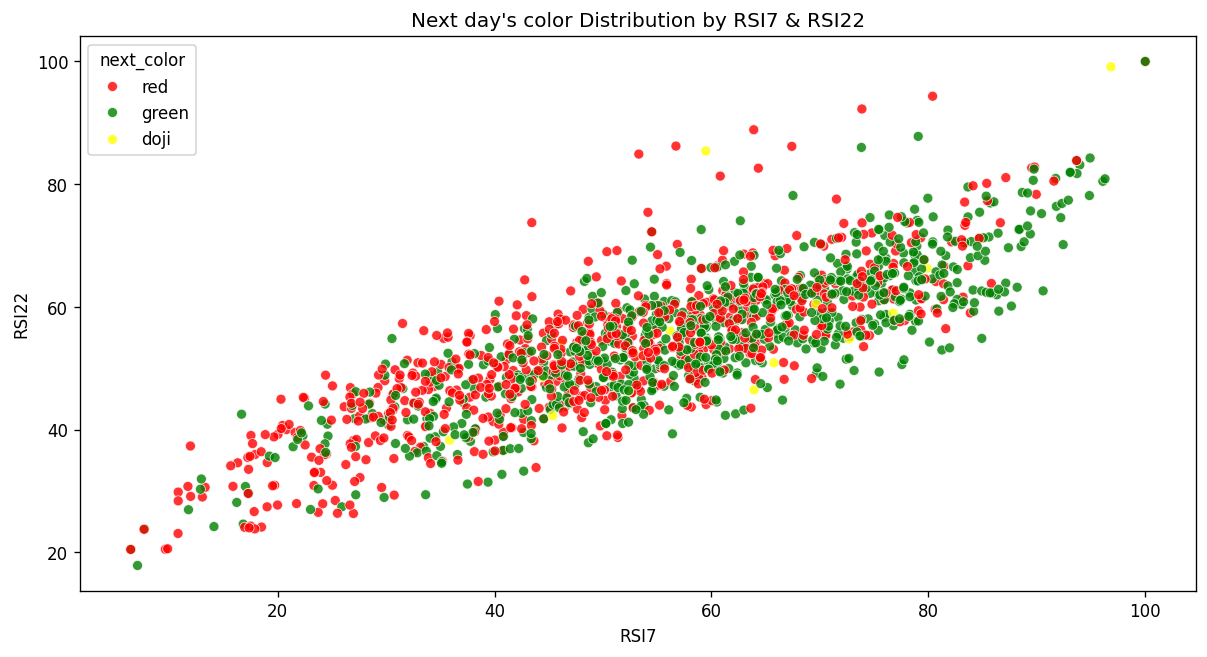

In [17]:
tmp_data = daily_data.copy()
tmp_data['RSI7'] = ta.rsi(tmp_data["Close"], length=7)
tmp_data['RSI22'] = ta.rsi(tmp_data["Close"], length=22)
tmp_data.dropna(inplace=True)
sns.scatterplot(
    data=tmp_data[['RSI7', 'RSI22', 'next_color']],
    x='RSI7',
    y='RSI22',
    hue='next_color',
    palette={'green':'green','red':'red','doji':'yellow'},
    alpha=0.8
)
plt.title("Next day's color Distribution by RSI7 & RSI22")